In [1]:

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show
%matplotlib inline
from bokeh.plotting import show, output_notebook
from bokeh.models import ColumnDataSource, OpenURL, TapTool
import os
output_notebook()
os.system('jupyter trust Visualisation_search_terms_reading_levelGS.ipynb')

Loading BokehJS ...

256

Rick Gerkin [3:16 PM]
Here is the list of ideas/suggestions I promised:
- Reduce the amount of stuff in the progress report.  You can have a different one for each week, or just copy them as needed, and remove all the stuff that isn't pertinent to the current work.  You can always bring it back in later.  If rendering figures, just render the ones you need to show the point.  


- Show some raw values in the table, e.g. the input resistance for a candidate model.  You don't need to show the test observation values, except maybe outside the table on a separate line (since they are the same for every gene using the same test).  

- Try scaling up to three parameters - you can reduce the grid sampling to, say 6x6x6 (from 10x10 for 2 parameters), that way it isn't too much more computationally complex. 

- Then you can show the corresponding figures and tables for this three parameter case, show all of the 2D cross-sections through the global optimum.  Or maybe you can think of other ways for showing 3D.  
- Make sure the code isn't getting too unwieldy.  Condense and refactor and clean up regularly.

In [2]:
import pickle
#!pip install prettyplotlib
import prettyplotlib as ppl
from prettyplotlib import plt
from prettyplotlib import brewer2mpl
import numpy as np
import string

green_purple = brewer2mpl.get_map('PRGn', 'diverging', 11).mpl_colormap


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams
from neuronunit.optimization.results_analysis import make_report, min_max
with open('pre_grid_reports.p','rb') as f:#
    grid_results = pickle.load(f)

with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)
pop = package[0]
print(pop[0].dtc.attrs.items())
history = package[4]
gen_vs_pop =  package[6]


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


dict_items([('a', 1.6653336694671734), ('b', -4.9440456900791241e-09), ('vr', -61.076737472776017)])


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.ndimage as ndi
import neuronunit.optimization.exhaustive_search as es

data = np.zeros((6, 6, 6))
#data = ndi.filters.gaussian_filter(data, sigma=1)

axis = [ [ str('vr'), str('a'), str('b') ], [ str('vr'), str('b'), str('a')], [ str('b'), str('a'), str('vr') ] ]

gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]

k = axis[0]
ee = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
zz = [ i.dtc.attrs[k[2]] for i in grid_results ]
yy = [ i.dtc.attrs[k[1]] for i in grid_results ]
xx = [ i.dtc.attrs[k[0]] for i in grid_results ]
print(xx,yy,zz)
hvc = es.make_hyper_cube(xx,yy,zz,ee)


def cube_show_slider(cube, axis=0, **kwargs):
    """
    Display a 3d ndarray with a slider to move along the third dimension.
    Extra keyword arguments are passed to imshow
    """
    # check dim
    if not cube.ndim == 3:
        raise ValueError("cube should be an ndarray with ndim == 3")

    # generate figure
    fig = plt.figure()
    ax = plt.subplot(111)
    fig.subplots_adjust(left=0.25, bottom=0.25)

    # select first image
    s = [slice(0, 1) if i == axis else slice(None) for i in range(3)]
    #print(s)
    im = cube[s].squeeze()
    #print(im)
    # display image
    l = ax.matshow(im, **kwargs)
    cb = plt.colorbar(l)
    cb.set_clim(vmin=data.min(), vmax=data.max())
    cb.draw_all()

    # define slider
    axcolor = 'lightgoldenrodyellow'
    ax = fig.add_axes([0.25, 0.1, 0.65, 0.03])#, axisbg=axcolor)
    slideryo = Slider(ax, 'Axis %i index' % axis, 0, cube.shape[axis] - 1, valinit=0, valfmt='%i')

    def update(val):
        ind = int(slideryo.val)
        s = [slice(ind, ind + 1) if i == axis else slice(None) for i in range(3)]
        im = cube[s].squeeze()
        l.set_data(im, **kwargs)
        cb.set_clim(vmin=data.min(), vmax=data.max())
        cb.formatter.set_powerlimits((0, 0))
        cb.update_ticks()
        cb.draw_all()
        fig.canvas.draw()

    slideryo.on_changed(update)
    plt.show()

#print(np.shape(hvc))
#print(k[2],k[1],k[0])

#cube_show_slider(hvc)

[-50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -106.0, -120.0, -50.0, -64.0, -78.0, -92.0, -10

In [4]:
#from neuronunit imp
super_pop = []

for gp in gen_vs_pop:
    super_pop.extend(gp)
minga,maxga = min_max(super_pop)
mingr,maxgr = min_max(grid_results)
#print(maxgr,mingr)
abs_min = np.min((mingr[1],minga[1]))
abs_max = np.max((maxgr[1],maxga[1]))
#print(abs_min,abs_max)
v = list(np.linspace(abs_min, abs_max, 15, endpoint=True))
print(v)

[1.9999994075813825, 1.999999449896998, 1.9999994922126136, 1.9999995345282291, 1.9999995768438446, 1.9999996191594602, 1.9999996614750757, 1.9999997037906914, 1.9999997461063068, 1.9999997884219223, 1.999999830737538, 1.9999998730531534, 1.9999999153687689, 1.9999999576843845, 2.0]


In [40]:
zz = [ list(i.dtc.scores.items()) for i in grid_results ]
print(zz)
xx = [ list(i.dtc.scores.items()) for i in pop ]
print(xx)

[[('RheobaseTestP', 1.0), ('InputResistanceTest', 0.999999980199005)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999994712013478)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.999999889846409)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999633466077)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999788495378)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999844914439)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999801990102)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.999999471201247)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999998898463954)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999633466058)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999788495374)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999844914438)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999999801990151)], [('RheobaseTestP', 1.0), ('InputResistanceTest', 0.9999994712011463)], [('Rheob

(1.9999994712005862, 139) (2.0, 215)


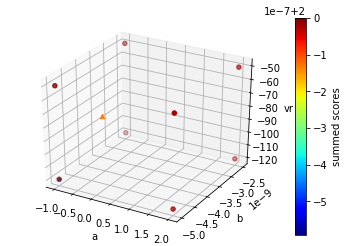

(1.9999994712005862, 139) (2.0, 215)


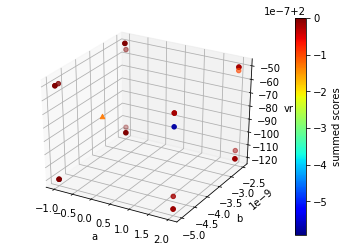

(1.9999994712005862, 139) (2.0, 215)


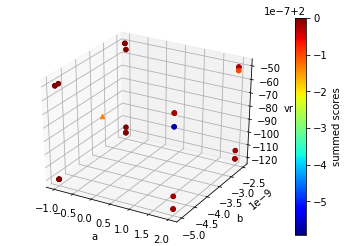

(1.9999994712005862, 139) (2.0, 215)


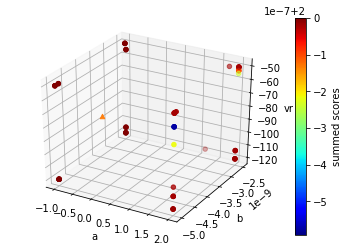

(1.9999994712005862, 139) (2.0, 215)


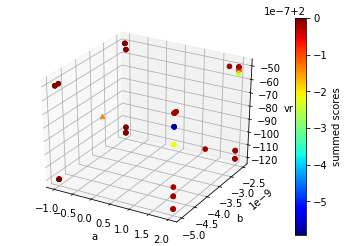

(1.9999994712005862, 139) (2.0, 215)


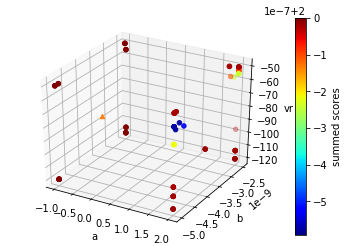

(1.9999994712005862, 139) (2.0, 215)


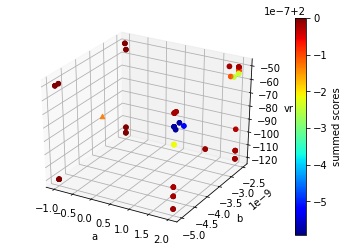

(1.9999994712005862, 139) (2.0, 215)


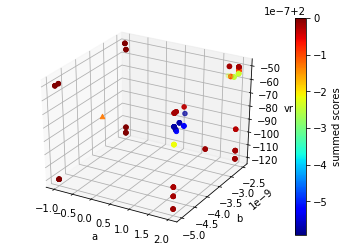

(1.9999994712005862, 139) (2.0, 215)


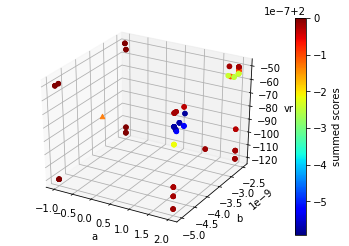

(1.9999994712005862, 139) (2.0, 215)


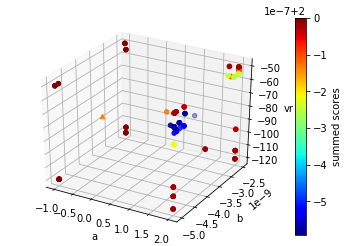

(1.9999994712005862, 139) (2.0, 215)


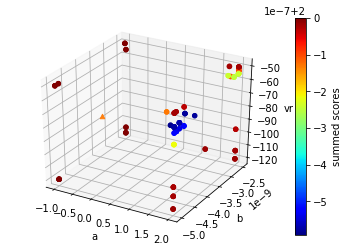

(1.9999994712005862, 139) (2.0, 215)


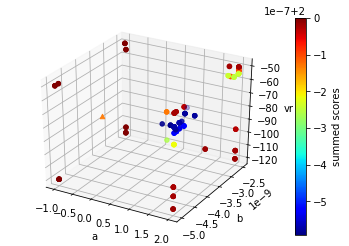

(1.9999994712005862, 139) (2.0, 215)


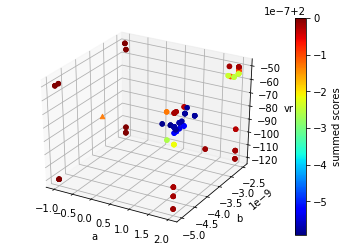

(1.9999994712005862, 139) (2.0, 215)


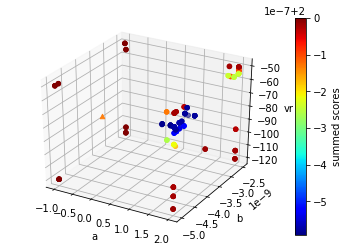

(1.9999994712005862, 139) (2.0, 215)


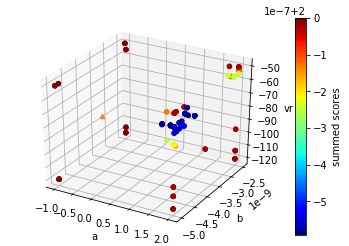

(1.9999994712005862, 139) (2.0, 215)


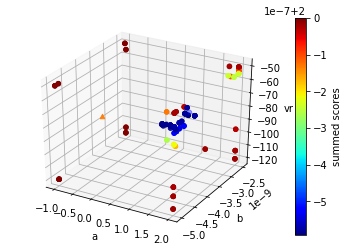

(1.9999994712005862, 139) (2.0, 215)


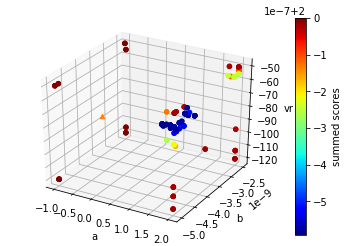

(1.9999994712005862, 139) (2.0, 215)


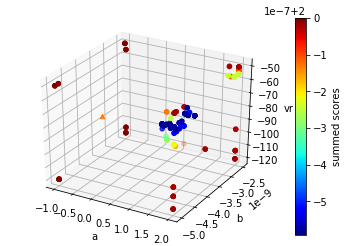

(1.9999994712005862, 139) (2.0, 215)


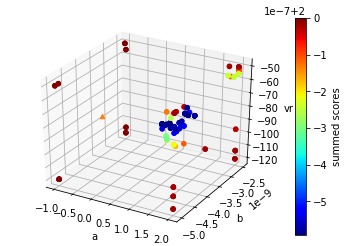

(1.9999994712005862, 139) (2.0, 215)


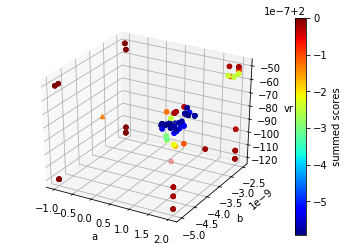

(1.9999994712005862, 139) (2.0, 215)


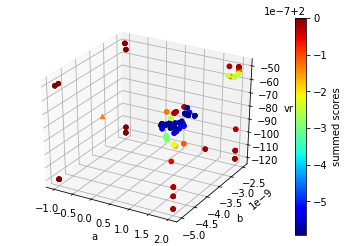

(1.9999994712005862, 139) (2.0, 215)


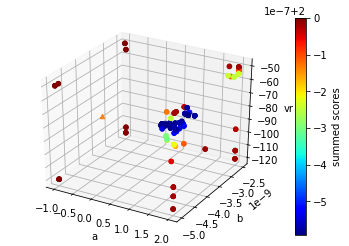

(1.9999994712005862, 139) (2.0, 215)


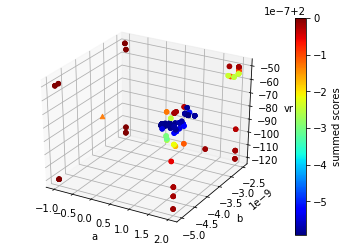

(1.9999994712005862, 139) (2.0, 215)


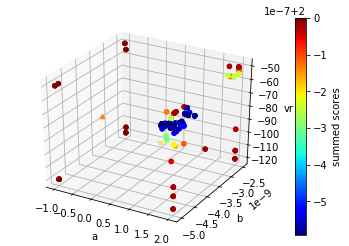

(1.9999994712005862, 139) (2.0, 215)


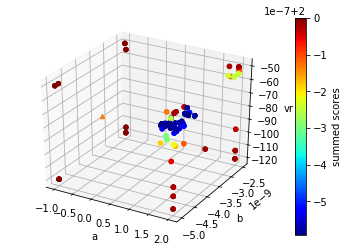

(1.9999994712005862, 139) (2.0, 215)


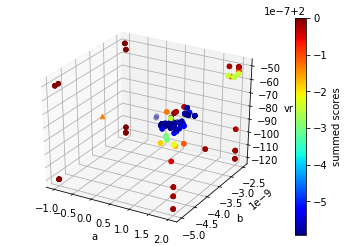

(1.9999994712005862, 139) (2.0, 215)


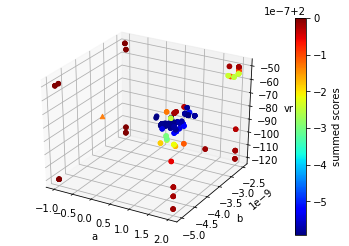

(1.9999994712005862, 139) (2.0, 215)


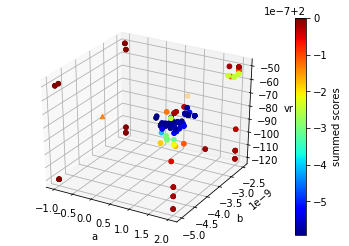

(1.9999994712005862, 139) (2.0, 215)


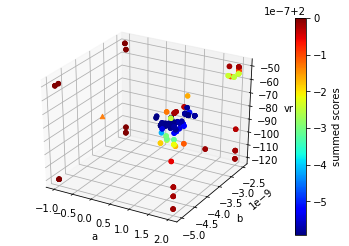

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


super_set = []
for i, pop in enumerate(gen_vs_pop):        
    other_points = []
    pf_points = []
    hof_points = []    
    labels = []

    for p in pop:
        xyz = []
        for k,v in p.dtc.attrs.items():
            xyz.append(v)
            labels.append(k)
        other_points.append(xyz)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    errors = [ np.sum(list(p.dtc.scores.values())) for p in pop ]
    xx = [ i[0] for i in other_points ]
    yy = [ i[1] for i in other_points ]
    zz = [ i[2] for i in other_points ]
    if len(super_set) !=0 :
        for ss in super_set:
            ops, ers = ss
            p = ax.scatter([i[0] for i in ops], [ i[1] for i in ops], [i[2] for i in ops], alpha=1, c=ers, cmap='jet', marker='o', vmin=abs_min, vmax=abs_max)
   
    p = ax.scatter(xx, yy, zz, c=errors, cmap='jet', marker='o', vmin=abs_min, vmax=abs_max)
    
    cb = fig.colorbar(p)

    cb.set_label('summed scores')
        
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]
    assert gbest!=gworst
    print(gbest,gworst)
    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs
    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs
    

    xyz = []
    for k,v in pop[0].dtc.attrs.items():
        xyz.append(gworst_grid_attrs[k])

    p = ax.scatter(xyz[0], xyz[1], xyz[2],cmap='jet', marker='*',label='worst', vmin=abs_min, vmax=abs_max)

    xyz = []

    for k,v in pop[0].dtc.attrs.items():
        xyz.append(gbest_grid_attrs[k])    


    p = ax.scatter(xyz[0], xyz[1], xyz[2],cmap='jet', marker='^',label='best', vmin=abs_min, vmax=abs_max)


    ax.set_xlabel(str(labels[0]))
    ax.set_ylabel(str(labels[1]))
    ax.set_zlabel(str(labels[2]))
    plt.savefig('particle_cube'+str(i)+str('.png'))
    super_set.append((other_points,errors))    

    plt.show()

In [17]:

    
    
with open('pre_grid_reports.p','rb') as f:
    grid_results = pickle.load(f)
    

with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)

from neuronunit.optimization import exhaustive_search

#fig, ax = plt.subplots(1)

#np.random.seed(10)

fig.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


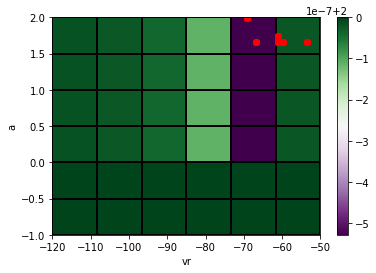

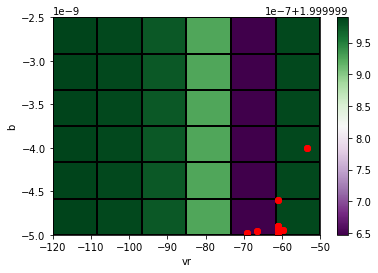

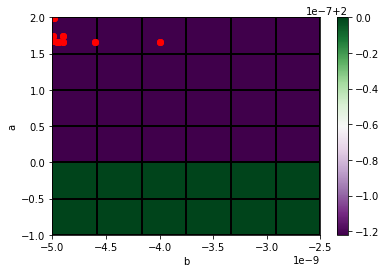

In [19]:
axis = [ [ str('vr'), str('a'), str('b') ], [ str('vr'), str('b'), str('a')], [ str('b'), str('a'), str('vr') ] ]

gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]

for k in axis:    
    
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results ]

    last_frame = len(gen_vs_pop)
    other_points = []
    pf_points = []
    hof_points = []
    labels = []
    
    pf = package[2]
    hof = package[1]
    
    for p in pop:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            other_points.append(xy)
            
            
    for p in pf:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            pf_points.append(xy)            
       
    for p in hof:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            hof_points.append(xy)        

            
    zi, yi, xi = np.histogram2d(yy, xx, bins=(6,6), weights=zz, normed=False)
    counts, _, _ = np.histogram2d(yy, xx, bins=(6,6))
    #binned , _, _ = np.histogram(zce, bins=10)

    zi = zi / counts
    zi = np.ma.masked_invalid(zi)
    fig, ax = plt.subplots()
    #scat = ppl.pcolormesh(fig, ax, xi, yi, zi, edgecolors='black', cmap=green_purple)
    scat = ax.pcolormesh(xi, yi, zi, edgecolors='black', cmap=green_purple)
    


    fig.colorbar(scat)
    ax.margins(0.05)

    #if i == last_frame-1:
    for xy in hof_points:
        ax.plot(xy[0], xy[1],'y*',label ='hall of fame') 
    for xy in pf_points:
        ax.plot(xy[0], xy[1],'b*',label ='pareto front') 
        #legend = ax.legend([rect("r"), rect("g"), rect("b")], ["gene population","pareto front","hall of fame"])


    for xy in other_points:
        ax.plot(xy[0], xy[1],'ro',label ='gene population') 
    ax.margins(0.05)

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()


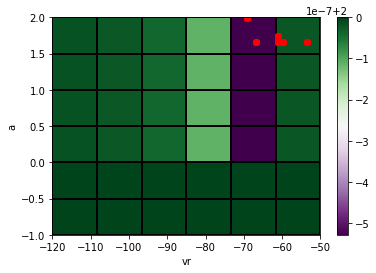

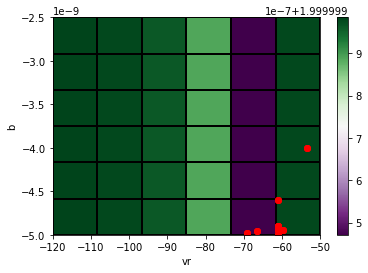

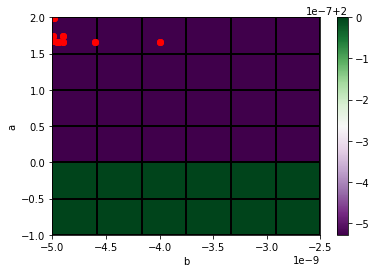

In [20]:

gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]
for k in axis:    
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]
    assert gbest!=gworst
    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs
    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs
    gba = gbest_grid_attrs[k[2]]   
    zz = [ np.sum(list(i.dtc.attrs.values())) for i in grid_results ]
    zce = [ np.sum(list(i.dtc.scores.values())) for i in grid_results if i.dtc.attrs[k[2]] == gba]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    last_frame = len(gen_vs_pop)
    other_points = []
    pf_points = []
    hof_points = []
    labels = []
    
    pf = package[2]
    hof = package[1]
    
    for p in pop:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            other_points.append(xy)
            
            
    for p in pf:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            pf_points.append(xy)            
       
    for p in hof:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            hof_points.append(xy)        

            
    zi, yi, xi = np.histogram2d(yy, xx, bins=(6,6), weights=zce, normed=False)
    counts, _, _ = np.histogram2d(yy, xx, bins=(6,6))

    zi = zi / counts
    zi = np.ma.masked_invalid(zi)
    fig, ax = plt.subplots()
    scat = ax.pcolormesh(xi, yi, zi, edgecolors='black', cmap=green_purple)

    fig.colorbar(scat)
    ax.margins(0.05)

    #if i == last_frame-1:
    for xy in hof_points:
        ax.plot(xy[0], xy[1],'y*',label ='hall of fame') 
    for xy in pf_points:
        ax.plot(xy[0], xy[1],'b*',label ='pareto front') 
        #legend = ax.legend([rect("r"), rect("g"), rect("b")], ["gene population","pareto front","hall of fame"])


    for xy in other_points:
        ax.plot(xy[0], xy[1],'ro',label ='gene population') 
    ax.margins(0.05)

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()

    
    

So imagine 6 2D plots.  The first three are:  XY at Z=z, XZ at Y=y, and YZ at X=x, where x, y, z 
is the location of the global minimum.  The second three are XY with the minimum taken across Z, 
XZ with the minumum taken across Y, YZ, with the minimum taken across X.
With these 6 I think you would get a pretty good idea of the contours around the global minimum.

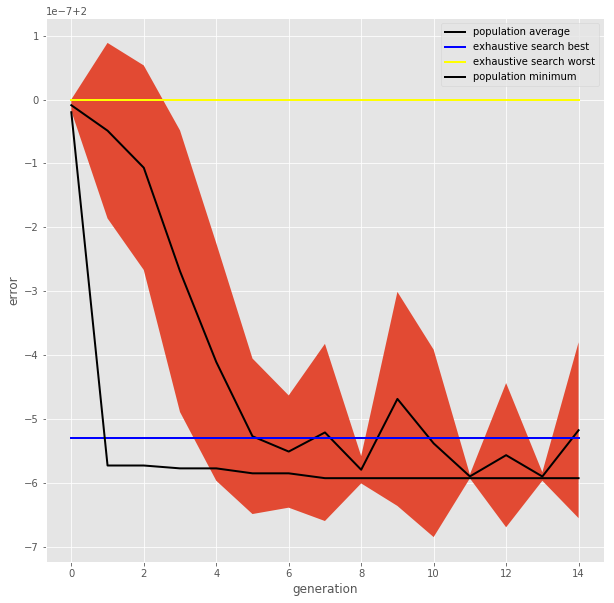

In [21]:


with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)
log = package[3]    
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]

mean = np.array([ np.sum(i) for i in log.select('avg')])
std = np.array([ np.sum(i) for i in log.select('std')])
minimum = np.array([ np.sum(i) for i in log.select('min')])
#minimum = np.array([ np.sum(i) for i in log.select('min')])
worst = np.max([ sum(g.dtc.scores.values()) for g in grid_results ])
#grid_min = np.min([ sum(g.dtc.scores.values()) for g in grid_results ])
gwl = [ worst for i in range(0,len(log.select('gen'))) ]
grid_min = np.min([ sum(g.dtc.scores.values()) for g in grid_results ])
gml = [ grid_min for i in range(0,len(log.select('gen'))) ]

stdminus = mean - std
stdplus = mean + std

axes.plot(
    gen_numbers,
    mean,
    color='black',
    linewidth=2,
    label='population average')

axes.plot(gen_numbers,
          gml,
          color='blue',
        linewidth=2,
        label='exhaustive search best')

   
axes.plot(gen_numbers,
          gwl,
          color='yellow',
        linewidth=2,
        label='exhaustive search worst')
       


axes.plot(
    gen_numbers,
    minimum,
    color='black',
    linewidth=2,
    label='population minimum')
axes.fill_between(gen_numbers, stdminus, stdplus)



plt.xlabel('generation')
plt.ylabel('error')


plt.legend()
plt.show()

In [22]:
new_report = make_report(grid_results,pop, 3)

from neuronunit.optimization import exhaustive_search as es
#dir(es)

Report: 
did it work? True was it better True
the difference between brute force candidates model parameters and the GA's model parameters:
-1.4653336694671732 0.2 1.66533366947 a
the relative distance scaled by the length of the parameter dimension of interest:
1.55061763965
the difference between brute force candidates model parameters and the GA's model parameters:
-5.5954309920876004e-11 -5e-09 -4.94404569008e-09 b
the relative distance scaled by the length of the parameter dimension of interest:
0.0223817239684
the difference between brute force candidates model parameters and the GA's model parameters:
-2.923262527223983 -64.0 -61.0767374728 vr
the relative distance scaled by the length of the parameter dimension of interest:
0.0487210421204
[1.0, 0.9999994075813825]
[1.0, 0.9999994075813825]
the difference between brute force candidates model parameters and the GA's model parameters:
-1.4653336694671732 0.2 1.66533366947 a
the relative distance scaled by the length of the parame

In [23]:

#fig.savefig('pcolormesh_prettyplotlib_labels_other_cmap_diverging.png')


In [32]:
import bokeh
import numpy as np
import matplotlib

In [33]:


from neuronunit.optimization.optimization_management import run_ga
from neuronunit.optimization.exhaustive_search import run_grid, reduce_params, create_grid
from neuronunit.optimization.model_parameters import model_params
import os
import pickle
from neuronunit.optimization import get_neab
reports = {}
npoints = 10



with open('pre_grid_reports.p','rb') as f:
    grid_results = pickle.load(f)
opt_keys = list(grid_results[0].dtc.attrs.keys())

with open('pre_ga_reports.p','rb') as f:
    ga_out = pickle.load(f)

pop = ga_out[0]

In [34]:

from neuronunit.optimization.exhaustive_search import create_grid
gp = create_grid(npoints = 6,nparams = 3)

    


Found tough parameters for which the GA is not able to perform particularily # well. Suspect b's error surface is not concave.
Explore 1D cross section.


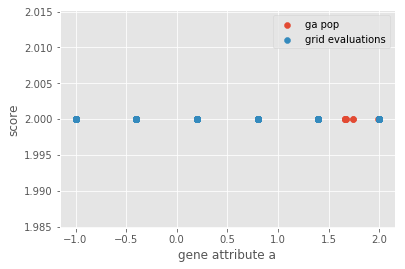

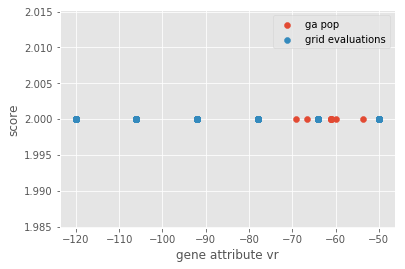

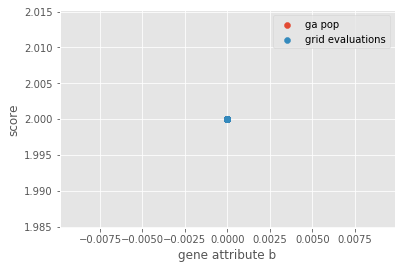

In [35]:

plt.clf()

plt.scatter([g.dtc.attrs['a'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['a'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute a')
plt.legend()
plt.show()


plt.scatter([g.dtc.attrs['vr'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['vr'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute vr')
plt.legend()
plt.show()



plt.scatter([g.dtc.attrs['b'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['b'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute b')
plt.legend()
plt.show()




In [36]:

nparams = 3
opt_keys = [str('a'),str('vr'),str('b')]


#grid_results = run_grid(nparams,npoints,tests,provided_keys = opt_keys)
from neuronunit.optimization import exhaustive_search #import run_grid, reduce_params, create_grid

from neuronunit.optimization.exhaustive_search import run_grid, reduce_params, create_grid
grid_points,maps = exhaustive_search.create_grid(npoints=6,nparams=3,provided_keys=opt_keys)
print(maps)

{'a': {0.94499999999999995: 0, 0.75600000000000001: 1, 0.56699999999999995: 2, 0.378: 3, 0.18899999999999995: 4, 0.0: 5}, 'vr': {-40.0: 0, -52.0: 1, -64.0: 2, -76.0: 3, -88.0: 4, -100.0: 5}, 'b': {-2.5000000000000001e-09: 0, -3e-09: 1, -3.4999999999999999e-09: 2, -4.0000000000000002e-09: 3, -4.5000000000000006e-09: 4, -5.0000000000000001e-09: 5}}


In [38]:
grid = np.zeros((6,6,6))
import matplotlib.pyplot as plt

for i in grid_results:
    xyz = []
    for k,v in i.dtc.attrs.items():
        xyz.append(maps[k][v])
    grid[xyz[0],xyz[1],xyz[2]] = sum(i.dtc.scores.values())

for i in range(0,6):
    flat = grid[i,:,:]
    plt.imshow(flat)
    plt.show()

for i in range(0,6):
    flat = grid[:,i,:]
    plt.imshow(flat)
    plt.show()
    
for i in range(0,6):
    flat = grid[:,:,i]
    plt.imshow(flat)
    plt.show()
        
    


KeyError: 2.0

In [ ]:
new_list = genes_vs_gen[1:-0]
print(new_list)

#![alt text](rick_style_guide.png "Ricks table guide")

In [ ]:
attrs_ = [ list(p.dtc.attrs.keys()) for i,p in history.genealogy_history.items() ]
attrs = attrs_[0]
print(attrs)

scores_ = [ list(p.dtc.scores.keys()) for i,p in history.genealogy_history.items() ]
scores = scores_[0]
from collections import OrderedDict

urlDats = []
hi = [ (i,p) for i,p in history.genealogy_history.items() ]
sc = [ (i,p) for i,p in enumerate(grid_results) ]

def history_iter(mapped):
    i,p = mapped
    urlDat = OrderedDict()
    urlDat['gene_number'] = i
    
    attrs = list(p.dtc.attrs.keys()) 
    scores = list(p.dtc.scores.keys()) 
    for a in attrs:
        urlDat[a] = p.dtc.attrs[a]    
    scores0 = scores[0]
    for s in scores:
        urlDat[s] = p.dtc.scores[s]
    urlDat[str('total')] = sum(p.dtc.scores.values())
    for k,v in p.dtc.score.items():
        urlDat[str(k)+str('_observation')] = v['observation']['mean'] 
        urlDat[str(k)+str('_prediction')] = v['observation']['mean'] 
    for k,v in p.dtc.scores.items():
        urlDat[str(k)] = v


    return urlDat
    
def process_dics(urlDats):
    dfs = []
    for urlDat in urlDats:
        # pandas Data frames are best data container for maths/stats, but steep learning curve.
        # Other exclusion criteria. Exclude reading levels above grade 100,
        # as this is most likely a problem with the metric algorithm, and or rubbish data in.
        # TODO: speed everything up, by performing exclusion criteri above not here.
        if len(dfs) == 0:
            dfs = pd.DataFrame(pd.Series(urlDat)).T
        dfs = pd.concat([ dfs, pd.DataFrame(pd.Series(urlDat)).T ])
    return dfs

genes = list(map(history_iter,hi))    
print(urlDats)
dfg = process_dics(genes)

grids = list(map(history_iter,sc))    
dfs = process_dics(grids)

dfg

In [ ]:
dfg

I am currently writing code that should enable the plotting of HOF values versus generation.

For some reason the global minimum solution is not converged on, as shown by the evolution of errors below:

For some reason, the GA population does not converge to the absolute minimum, although it does sample it.
Perhaps the absolute minimum is a highly dominated solution, which is a testable hypthosis.

None the less because the GA samples the absolute minimum, this value can be corroborated with the GA.

# Quantize distance between minimimum error and maximum error.
This step will allow the GA's performance to be located within or below the range of error found by grid search.


The code below reports on the differences between between attributes of best models found via grid versus attributes of best models found via GA search:
